<a href="https://colab.research.google.com/github/22A95A0510-2625/Infosys_SpringBoard_Project/blob/main/Model_Training_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import os
import pickle

In [ ]:
# Load the dataset
ticker='TSLA'
df=yf.download(ticker)

data=df.copy()

#save the data to csv
#data.to_csv(os.path.join('data/input',f'{ticker}.csv'),index=False)

datacopy=df.copy()
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
# Statistical information of the dataset & missing values
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3.605000e+03
mean,77.987374,79.683749,76.175309,77.966721,77.966721,9.662391e+07
std,103.473110,105.749892,100.986338,103.397520,103.397520,7.810133e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,11.866667,12.115333,11.568667,11.904000,11.904000,4.835700e+07
50%,17.638666,17.955999,17.379333,17.677999,17.677999,8.198100e+07
75%,173.050003,176.149994,169.059998,173.440002,173.440002,1.223940e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
# Finding data types
df.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
# Finding missing values
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# Convert the index to datetime
df['Date']=pd.to_datetime(df.index)

# Remove missing values if any
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,2010-06-29
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,2010-06-30
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,2010-07-01
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,2010-07-02
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,2010-07-06


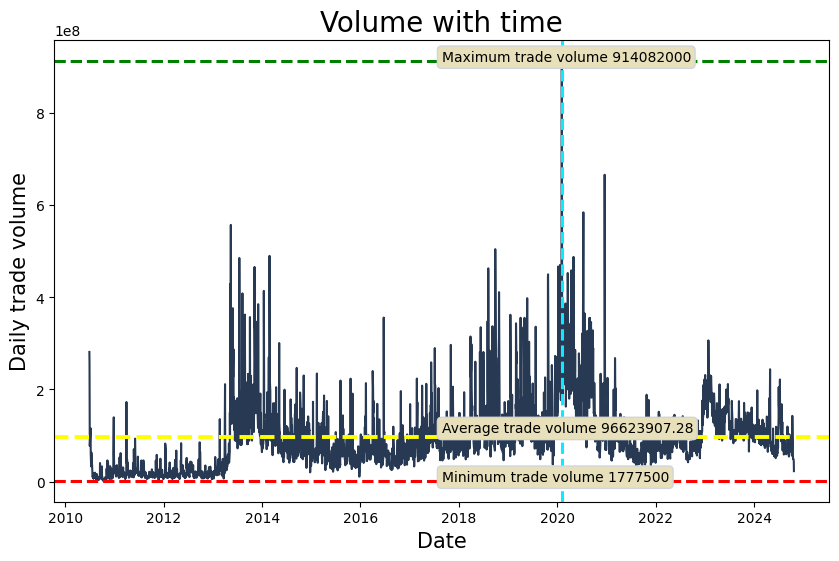

In [ ]:
# x and y coords for average trade volume
ave_x = df['Date'].mean()
ave_y = df['Volume'].mean()
# y coord for max trade vol
max_y = df['Volume'].max()
# y coord for min trade vol
min_y = df['Volume'].min()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['Date'], df['Volume'], color='#283954')
ax.set_title("Volume with time", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily trade volume", fontsize=15)
ax.axhline(y=df['Volume'].max(), linestyle='--', lw=2.2, color='green')
ax.axhline(y=df['Volume'].min(), linestyle='--',lw=2.2, color='red')
ax.axhline(y=df['Volume'].mean(), linestyle='--',lw=2.8, color='yellow')
ax.axvline(x=df[df['Volume'] == max_y]['Date'].values, ls='--', lw='2.2', color='#0aebff')
ax.annotate(f"Average trade volume {round(df['Volume'].mean(),2)}",
                xy=(ave_x,ave_y),xytext=(ave_x,ave_y + 10000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Maximum trade volume {df['Volume'].max()}",
                xy=(ave_x,max_y),xytext=(ave_x,max_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Minimum trade volume {df['Volume'].min()}",
                xy=(ave_x,min_y),xytext=(ave_x,min_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
plt.show()

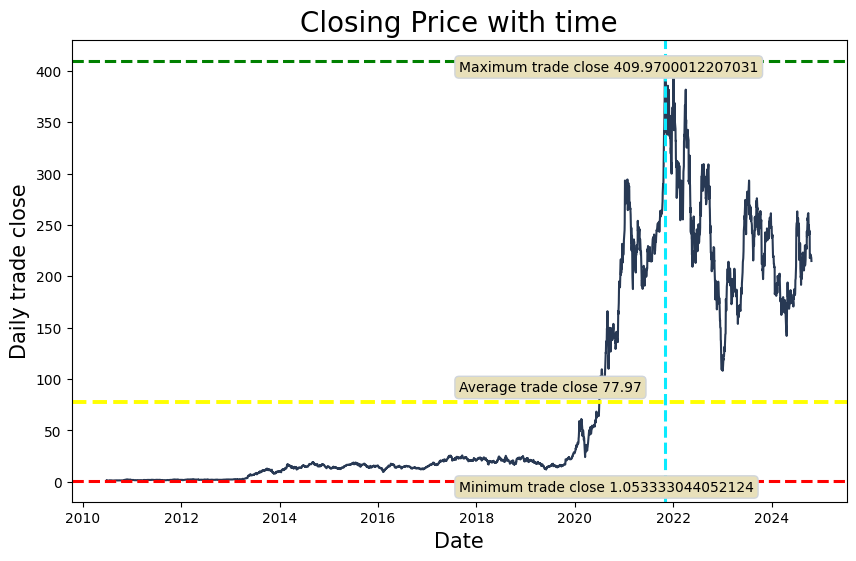

In [ ]:
# x and y coords for average trade close
ave_x = df['Date'].mean()
ave_y = df['Close'].mean()
# y coord for max trade close
max_y = df['Close'].max()
# y coord for min trade close
min_y = df['Close'].min()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['Date'], df['Close'], color='#283954')
ax.set_title("Closing Price with time", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily trade close", fontsize=15)
ax.axhline(y=df['Close'].max(), linestyle='--', lw=2.2, color='green')
ax.axhline(y=df['Close'].min(), linestyle='--',lw=2.2, color='red')
ax.axhline(y=df['Close'].mean(), linestyle='--',lw=2.8, color='yellow')
ax.axvline(x=df[df['Close'] == max_y]['Date'].values, ls='--', lw='2.2', color='#0aebff')
ax.annotate(f"Average trade close {round(df['Close'].mean(),2)}",
                xy=(ave_x,ave_y),xytext=(ave_x,ave_y + 10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Maximum trade close {df['Close'].max()}",
                xy=(ave_x,max_y),xytext=(ave_x,max_y - 10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Minimum trade close {df['Close'].min()}",
                xy=(ave_x,min_y),xytext=(ave_x,min_y - 10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
plt.show()

### 2.Feature Engineering

In [ ]:
import holidays
# Generate lagged variables
for lag in range(1, 8):  # 1 to 7 days lag
    datacopy[f'lag_{lag}'] = datacopy['Close'].shift(lag)

# Generate rolling statistics
datacopy['rolling_mean_7'] = datacopy['Close'].rolling(window=7).mean()
datacopy['rolling_std_7'] = datacopy['Close'].rolling(window=7).std()
datacopy['rolling_mean_30'] = datacopy['Close'].rolling(window=30).mean()
datacopy['rolling_std_30'] = datacopy['Close'].rolling(window=30).std()

# Generate holiday indicator
us_holidays = holidays.US()
datacopy['is_holiday'] = datacopy.index.to_series().apply(lambda x: 1 if x in us_holidays else 0)


datacopy.head()

,Open,High,Low,Close,Adj Close,Volume,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,is_holiday
Date,,,,,,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.592667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.588667,1.592667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.464000,1.588667,1.592667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.280000,1.464000,1.588667,1.592667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# Extract date features
datacopy['day_of_week'] = datacopy.index.dayofweek  # Monday=0, Sunday=6
datacopy['month'] = datacopy.index.month
datacopy['is_month_start'] = datacopy.index.is_month_start.astype(int)
datacopy['is_month_end'] = datacopy.index.is_month_end.astype(int)
datacopy['is_quarter_start'] = datacopy.index.is_quarter_start.astype(int)
datacopy['is_quarter_end'] = datacopy.index.is_quarter_end.astype(int)
datacopy['is_year_start'] = datacopy.index.is_year_start.astype(int)
datacopy['is_year_end'] = datacopy.index.is_year_end.astype(int)

# Weekend indicator
datacopy['is_weekend'] = datacopy['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

datacopy.head()

,Open,High,Low,Close,Adj Close,Volume,lag_1,lag_2,lag_3,lag_4,...,is_holiday,day_of_week,month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,...,0,1,6,0,0,0,0,0,0,0
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.592667,NaN,NaN,NaN,...,0,2,6,0,1,0,1,0,0,0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.588667,1.592667,NaN,NaN,...,0,3,7,1,0,1,0,0,0,0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.464000,1.588667,1.592667,NaN,...,0,4,7,0,0,0,0,0,0,0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.280000,1.464000,1.588667,1.592667,...,0,1,7,0,0,0,0,0,0,0


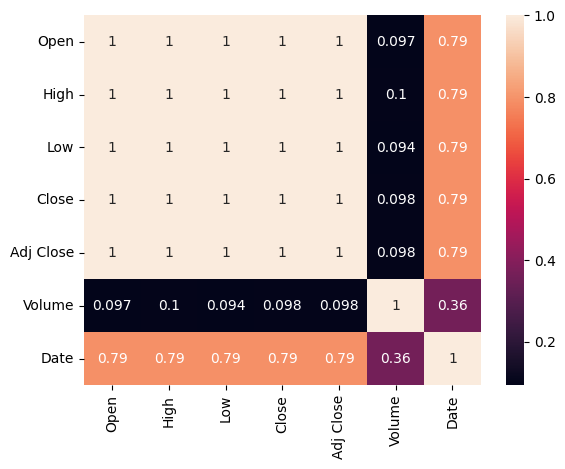

In [ ]:
# Compute the correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True)

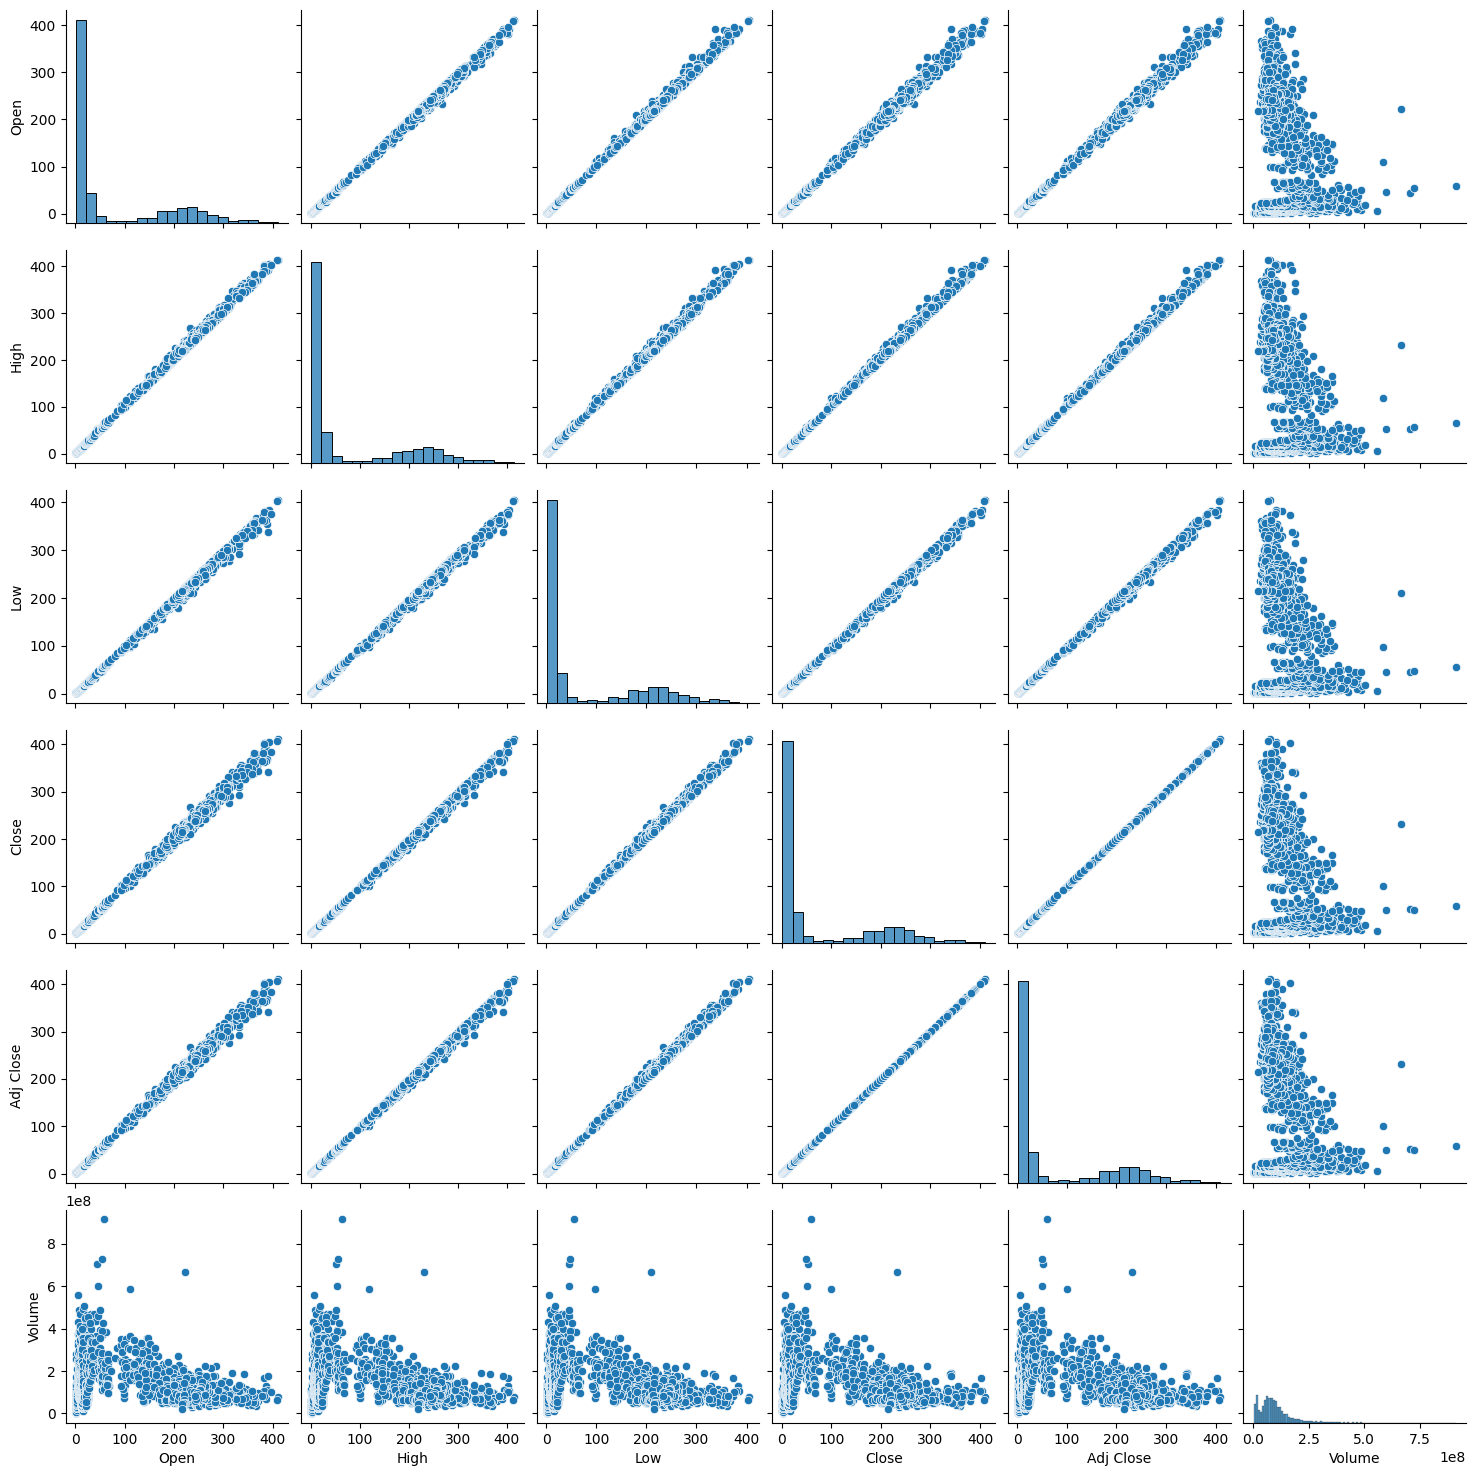

In [ ]:
# pair plot
sns.pairplot(df)

Text(0, 0.5, 'Price difference')

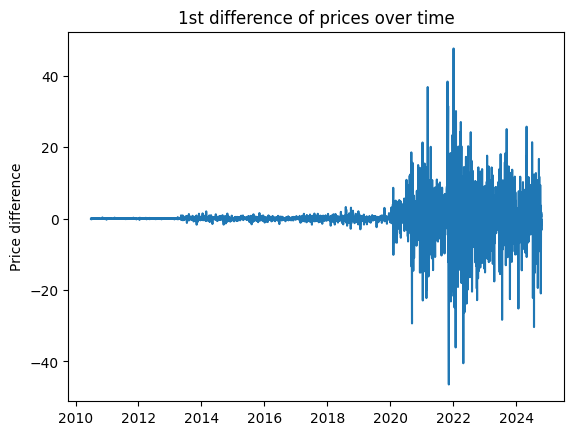

In [ ]:
# for stationarity

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# 1st difference of closing values
df['Close1d']=np.concatenate([[0],np.diff(df.Close)])
plt.plot(df['Close1d'])
plt.title('1st difference of prices over time')
plt.ylabel('Price difference')

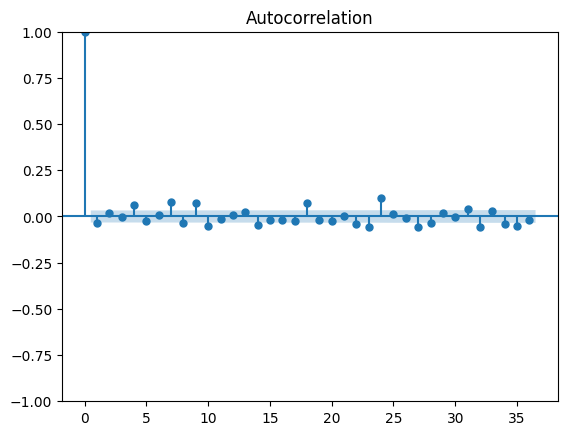

In [ ]:
acf_plot=plot_acf(df.Close1d)

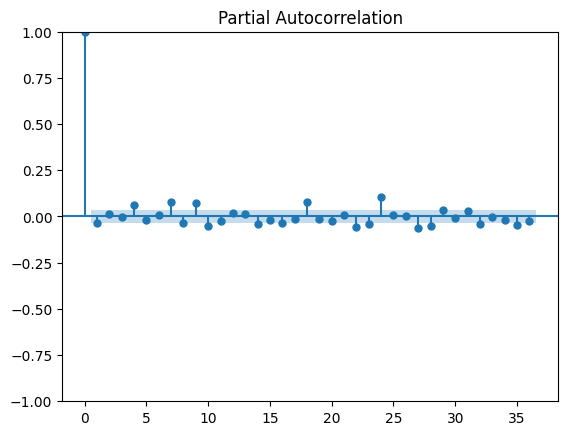

In [ ]:
pacf_plot=plot_pacf(df.Close1d)

In [ ]:
# Converting to date-time format with frequency information
data = df.asfreq(pd.infer_freq(df.index))
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Close1d
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0,2010-06-29,0.000000
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500.0,2010-06-30,-0.004000
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000.0,2010-07-01,-0.124667
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000.0,2010-07-02,-0.184000
2010-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [ ]:
# Extracting important features
data=pd.DataFrame(data.Close,data.index)
data.dropna(inplace=True)

# Saving the data as csv
#data.to_csv(os.path.join('data/input',f'{ticker}processed.csv'),index=False)
data.head()

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


3.Model Development

In [ ]:
from sklearn.model_selection import train_test_split
test_size=0.1

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

# Print the shapes of the training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (3244, 1)
Testing data shape: (361, 1)


ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARIMAmodel=None
# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    ARIMAmodel=model_fit
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
train, test = train_data['Close'].values,test_data['Close'].values

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add  another value to the training set
    obs = test[t]
    history.append(obs)
test_data['ARIMAPredictions']=predictions

In [ ]:
# Ensure the directory exists
model_dir = 'models/'
os.makedirs(model_dir, exist_ok=True)

# Ensure the directory exists
plot_dir = 'results/plots'
os.makedirs(plot_dir, exist_ok=True)

In [ ]:
# Ensure the directory exists
model_dir = 'models/pre-trained models/'
os.makedirs(model_dir, exist_ok=True)

# Generate the file path
model_file_path = os.path.join(model_dir, f'{ticker}_arima.pkl')

# Save the model to disk
with open(model_file_path, 'wb') as f:
    pickle.dump(ARIMAmodel, f)

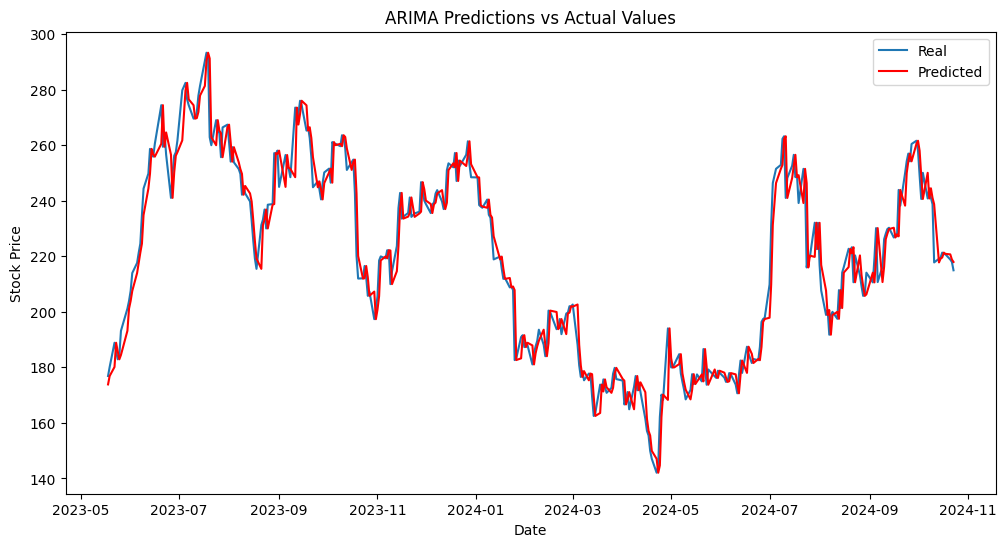

In [ ]:
# Ensure the directory exists
plot_dir = 'results/plots'
os.makedirs(plot_dir, exist_ok=True)

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_data.index,test_data.Close, label='Real')
plt.plot(test_data.index,test_data.ARIMAPredictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Save the plot
plt.savefig(os.path.join(plot_dir, f'{ticker}_arima.png'))

plt.show()

SIMPLE EXPONENTIAL SMOOTHING

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
sesmodel=None
# Define the Exponential Smoothing model
def exp_smoothing_forecast(history):
    # Fit the model
    model = SimpleExpSmoothing(history)
    model_fit = model.fit()
    sesmodel=model_fit
    # Make the prediction
    yhat = model_fit.forecast(1)[0]
    return yhat

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = exp_smoothing_forecast(history)
    predictions.append(yhat)
    # Add another value to the training set
    obs = test[t]
    history.append(obs)

test_data['SESPredictions'] = predictions

In [ ]:
# Generate the file path
model_file_path = os.path.join(model_dir, f'{ticker}_ses.pkl')

# Save the model to disk
with open(model_file_path, 'wb') as f:
    pickle.dump(sesmodel, f)

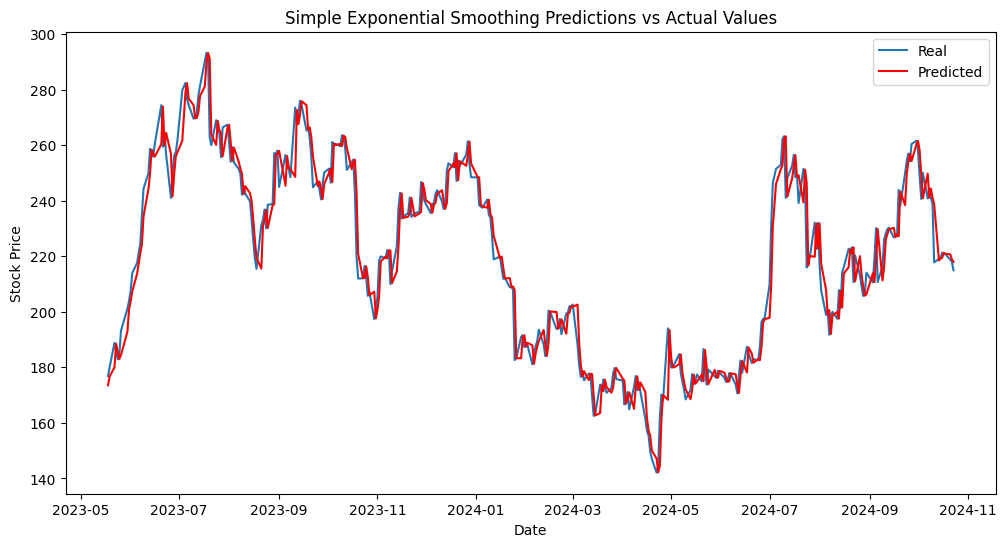

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_data.index,test_data.Close, label='Real')
plt.plot(test_data.index,test_data.SESPredictions, color='red', label='Predicted')
plt.title('Simple Exponential Smoothing Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Save the plot
plt.savefig(os.path.join(plot_dir, f'{ticker}_ses.png'))

plt.show()

Holt's Linear Exponetial Smoothing

In [ ]:
from statsmodels.tsa.api import Holt
holtmodel=None
# Define the Holt's linear exponential smoothing model
def holt_linear_forecast(history):
    # Fit the model
    model = Holt(history)
    model_fit = model.fit()
    holtmodel=model_fit

    # Make the prediction
    yhat = model_fit.forecast(1)[0]
    return yhat

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = holt_linear_forecast(history)
    predictions.append(yhat)
    # Add another value to the training set
    obs = test[t]
    history.append(obs)

test_data['HoltzPredictions'] = predictions

In [ ]:
# Generate the file path
model_file_path = os.path.join(model_dir, f'{ticker}_holt.pkl')

# Save the model to disk
with open(model_file_path, 'wb') as f:
    pickle.dump(holtmodel, f)

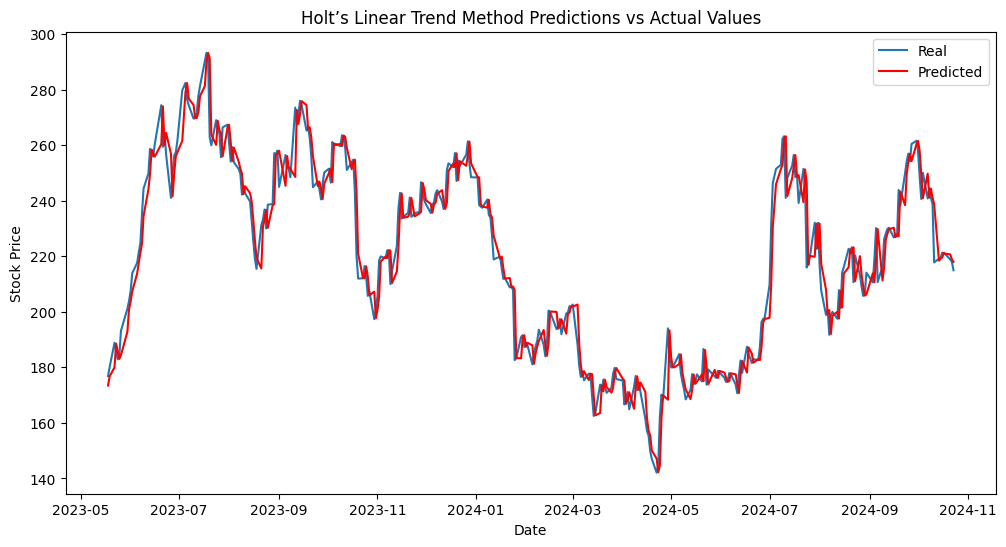

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_data.index,test_data.Close, label='Real')
plt.plot(test_data.index,test_data.HoltzPredictions, color='red', label='Predicted')
plt.title('Holt’s Linear Trend Method Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Save the plot
plt.savefig(os.path.join(plot_dir, f'{ticker}_holt.png'))

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error)
# Dictionary to store results
results = {}

# List of model columns
model_columns = ["ARIMAPredictions", "SESPredictions", "HoltzPredictions" ]#"ProphetPredictions"]

# True values
true_values = test_data["Close"]

# Evaluate each model
for model in model_columns:
    predictions = test_data[model]

    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mae = mean_absolute_error(true_values, predictions)
    mape = mean_absolute_percentage_error(true_values, predictions)

    results[model] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Print results
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  MAPE: {metrics['MAPE']:.2f}%\n")

Model: ARIMAPredictions
  RMSE: 7.3353
  MAE: 5.3835
  MAPE: 2.46%

Model: SESPredictions
  RMSE: 7.3410
  MAE: 5.3811
  MAPE: 2.46%

Model: HoltzPredictions
  RMSE: 7.3397
  MAE: 5.3790
  MAPE: 2.46%

